# 1) Packages

In [1]:
import numpy as np
from numpy import array, hstack
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns


from datetime import datetime, timedelta


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.utils import shuffle

from sklearn import preprocessing

rcParams['figure.figsize'] = 20, 6

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [32]:
from keras.models import load_model
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, Embedding, Masking, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam
from keras.utils import Sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

import re


Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

# 2) Getting File Names in a Folder

In [2]:
# Getting all the files in the directory.
def existing_file_list(path):
    ''' Extracting File Names '''

    allFiles = glob.glob(path + "/*.csv")
    new_list = []
    for i in allFiles:
        before = 'original\\'
        after = '_minute'
        ticker = i[i.find(before) + len(before) : i.find(after)]
        new_list.append(ticker)    
    #list_ticker = list(filter(None, text))  # drop all the empty elements and put them in a list
        
    return (new_list)


In [4]:
datapath = 'D:\\OneDrive - Georgia State University\\Data Science\\Personal_Project\\FPL_Analysis\\Data\\'

from os import listdir
from os.path import isfile, join
main_data_list = [f for f in listdir(datapath) if isfile(join(datapath, f))]

In [5]:
datapath

'D:\\OneDrive - Georgia State University\\Data Science\\Personal_Project\\FPL_Analysis\\Data\\'

In [6]:
main_data_list

['each_player_each_game.csv',
 'elements2019.csv',
 'elements2019.xlsx',
 'element_stats2019.csv',
 'element_stats2019.xlsx',
 'element_types2019.csv',
 'element_types2019.xlsx',
 'fixtures2019.xlsx',
 'game_settings2019.xlsx',
 'history2019.xlsx',
 'history_past2019.xlsx',
 'phases2019.csv',
 'phases2019.xlsx',
 'teams2019.csv',
 'teams2019.xlsx']

# 3) Data Manipulating

## 3.1) Import main_data

In [18]:
#element_types = pd.read_csv(datapath + 'element_types.xlsx',index_col='id', engine = 'python')

#main_data = pd.read_csv(datapath + 'each_player_each_game.csv', index_col=['id', 'fixture'], engine = 'python')
main_data = pd.read_csv(datapath + 'each_player_each_game.csv', engine = 'python')

#teams = pd.read_excel(datapath + 'teams.xlsx',index_col='id')


In [21]:
main_data.drop('Unnamed: 0', axis=1, inplace=True)
main_data.head()

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out
0,1,10,13,0,False,2019-08-11T13:00:00Z,0,1,1,0,...,0,0.0,0.0,0.0,0.0,55,0,33117,0,0
1,1,11,5,0,True,2019-08-17T11:30:00Z,2,1,2,0,...,0,0.0,0.0,0.0,0.0,55,-5280,36709,2868,8148
2,1,24,10,0,False,2019-08-24T16:30:00Z,3,1,3,0,...,0,0.0,0.0,0.0,0.0,54,-6882,30975,534,7416
3,1,31,17,0,True,2019-09-01T15:30:00Z,2,2,4,0,...,0,0.0,0.0,0.0,0.0,54,-3872,28096,346,4218
4,1,49,18,0,False,2019-09-15T15:30:00Z,2,2,5,0,...,0,0.0,0.0,0.0,0.0,53,-2073,26902,581,2654


In [22]:
main_data.head()
main_data.tail()

main_data.shape

(11624, 31)

## 3.3) Create main_data for each group

In [11]:
teams.head()

,code,name,short_name,strength,strength_attack_away,strength_attack_home,strength_defence_away,strength_defence_home,strength_overall_away,strength_overall_home
id,,,,,,,,,,
1,3,Arsenal,ARS,4,1260,1240,1320,1270,1310,1280
2,91,Bournemouth,BOU,3,1120,1090,1200,1150,1170,1130
3,36,Brighton,BHA,2,1080,1040,1120,1030,1100,1040
4,90,Burnley,BUR,3,1150,1040,1070,1040,1090,1080
5,97,Cardiff,CAR,2,1060,1020,1030,1010,1050,1020


In [12]:
main_data.columns
bootstrap.columns
teams.columns

Index(['name', 'assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'bps', 'clean_sheets',
       'clearances_blocks_interceptions', 'completed_passes', 'creativity',
       'dribbles', 'errors_leading_to_goal', 'errors_leading_to_goal_attempt',
       'fouls', 'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'key_passes', 'minutes', 'offside', 'open_play_crosses',
       'opponent_team', 'own_goals', 'penalties_conceded', 'penalties_missed',
       'penalties_saved', 'recoveries', 'red_cards', 'round', 'saves',
       'selected', 'tackled', 'tackles', 'target_missed', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'winning_goals',
       'yellow_cards', 'team', 'position'],
      dtype='object')

Index(['assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'dreamteam_count', 'element_type', 'ep_this', 'event_points',
       'first_name', 'form', 'goals_conceded', 'goals_scored', 'ict_index',
       'in_dreamteam', 'influence', 'minutes', 'now_cost', 'own_goals',
       'penalties_missed', 'penalties_saved', 'photo', 'points_per_game',
       'red_cards', 'saves', 'second_name', 'status', 'team', 'team_code',
       'threat', 'total_points', 'value_form', 'value_season', 'web_name',
       'yellow_cards'],
      dtype='object')

Index(['code', 'name', 'short_name', 'strength', 'strength_attack_away',
       'strength_attack_home', 'strength_defence_away',
       'strength_defence_home', 'strength_overall_away',
       'strength_overall_home'],
      dtype='object')

In [13]:
main_data['unique_id'] = np.arange(len(main_data))

In [14]:
## Drop player with 0 points

In [15]:
main_data[main_data['position'] == 1]['total_points'].sum()

2731

In [16]:
main_data.head()

name  assists  attempted_passes  big_chances_created  \
id fixture                                                                
1  1        Petr_Cech_1        0                42                    0   
   14       Petr_Cech_1        0                35                    0   
   21       Petr_Cech_1        0                24                    0   
   33       Petr_Cech_1        0                38                    0   
   46       Petr_Cech_1        0                33                    0   

            big_chances_missed  bonus  bps  clean_sheets  \
id fixture                                                 
1  1                         0      0   24             0   
   14                        0      0   26             0   
   21                        0      0   17             0   
   33                        0      0    8             0   
   46                        0      0   13             0   

            clearances_blocks_interceptions  completed_passes    ...      \
id fixture                                                       ...       
1  1                                      2                31    ...       
   14                                     1                25    ...       
   21                                     0                20    ...       
   33                                     0                24    ...       
   46                                     2                23    ...       

            transfers_balance  transfers_in  transfers_out  value  was_home  \
id fixture                                                                    
1  1                        0             0              0     50      True   
   14                     188          6059           5871     50     False   
   21                    8540         19550          11010     50      True   
   33                    9582         19332           9750     50     False   
   46                   -3297          8837          12134     50     False   

            winning_goals  yellow_cards  team  position  unique_id  
id fixture                                                          
1  1                    0             0     1         1          0  
   14                   0             0     1         1          1  
   21                   0             0     1         1          2  
   33                   0             0     1         1          3  
   46                   0             0     1         1          4  

[5 rows x 50 columns]

In [17]:
by_team = main_data.groupby(['team']).sum()
by_team.to_csv(datapath + 'by_team.csv')

by_position = main_data.groupby(['position']).sum()
by_position.to_csv(datapath + 'by_position.csv')

by_player = main_data.groupby(main_data['name']).sum()
by_player.to_csv(datapath + 'by_player.csv')

In [18]:
by_player.sort_values('total_points',inplace=True, ascending=False)

In [19]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21790 entries, (1, 1) to (624, 375)
Data columns (total 50 columns):
name                               21790 non-null object
assists                            21790 non-null int64
attempted_passes                   21790 non-null int64
big_chances_created                21790 non-null int64
big_chances_missed                 21790 non-null int64
bonus                              21790 non-null int64
bps                                21790 non-null int64
clean_sheets                       21790 non-null int64
clearances_blocks_interceptions    21790 non-null int64
completed_passes                   21790 non-null int64
creativity                         21790 non-null float64
dribbles                           21790 non-null int64
errors_leading_to_goal             21790 non-null int64
errors_leading_to_goal_attempt     21790 non-null int64
fouls                              21790 non-null int64
goals_conceded                     217

- by team
- by position
- by 

- It seems like there are a lot of missing values

## 3.4) Handling Missing Value

In [20]:
main_data.isnull().values.any()
bootstrap.isnull().values.any()
teams.isnull().values.any()

False

False

False

In [21]:
bootstrap.isnull().sum()

assists             0
bonus               0
bps                 0
clean_sheets        0
creativity          0
dreamteam_count     0
element_type        0
ep_this             0
event_points        0
first_name          0
form                0
goals_conceded      0
goals_scored        0
ict_index           0
in_dreamteam        0
influence           0
minutes             0
now_cost            0
own_goals           0
penalties_missed    0
penalties_saved     0
photo               0
points_per_game     0
red_cards           0
saves               0
second_name         0
status              0
team                0
team_code           0
threat              0
total_points        0
value_form          0
value_season        0
web_name            0
yellow_cards        0
dtype: int64

In [22]:
main_data[main_data['total_points'].isnull()]

,,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,...,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,team,position,unique_id
id,fixture,,,,,,,,,,,,,,,,,,,,,


In [23]:
main_data[main_data.isnull().all(1)]

,,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,...,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,team,position,unique_id
id,fixture,,,,,,,,,,,,,,,,,,,,,


In [24]:
main_data.describe()

,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,...,total_points,transfers_balance,transfers_in,transfers_out,value,winning_goals,yellow_cards,team,position,unique_id
count,21790.000000,21790.000000,21790.000000,21790.000000,21790.000000,21790.000000,21790.000000,21790.000000,21790.000000,21790.000000,...,21790.000000,2.179000e+04,21790.000000,2.179000e+04,21790.000000,21790.000000,21790.000000,21790.000000,21790.000000,21790.000000
mean,0.042818,15.996329,0.049702,0.039376,0.111152,6.329876,0.107572,1.292520,12.738550,5.132455,...,1.424094,5.866516e+02,9763.501882,9.176952e+03,51.416246,0.013584,0.056035,10.572556,2.583020,10894.500000
std,0.220465,22.867968,0.241537,0.215748,0.496756,9.932811,0.309847,2.585448,19.522709,11.102271,...,2.563758,4.268968e+04,35751.416540,3.158310e+04,12.536240,0.115760,0.229994,5.787709,0.861284,6290.375519
min,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000,0.000000,0.000000,0.000000,0.000000,...,-4.000000,-1.156152e+06,0.000000,0.000000e+00,38.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.301000e+03,44.000000,1.400000e+02,44.000000,0.000000,0.000000,6.000000,2.000000,5447.250000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.500000e+01,319.000000,9.355000e+02,48.000000,0.000000,0.000000,10.000000,3.000000,10894.500000
75%,0.000000,28.000000,0.000000,0.000000,0.000000,11.000000,0.000000,1.000000,21.000000,3.500000,...,2.000000,3.300000e+01,3468.750000,6.130000e+03,55.000000,0.000000,0.000000,16.000000,3.000000,16341.750000
max,3.000000,180.000000,3.000000,4.000000,3.000000,92.000000,1.000000,22.000000,164.000000,134.800000,...,23.000000,8.283400e+05,843341.000000,1.174804e+06,136.000000,1.000000,1.000000,20.000000,4.000000,21789.000000


In [25]:
main_data.to_csv(datapath + 'main_data.csv')

# 4) Visualization

## 4.1) Plot

In [35]:
by_player['total_points'].head()

name
Mohamed_Salah_253       259
Eden_Hazard_122         238
Raheem_Sterling_270     234
Sadio_Man?_251          231
Andrew_Robertson_247    213
Name: total_points, dtype: int64

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x14336c08320>,
 <a list of 5 Text xticklabel objects>)

Text(0, 0.5, 'Points')

Text(0.5, 1.0, 'Points Earned by Positions')

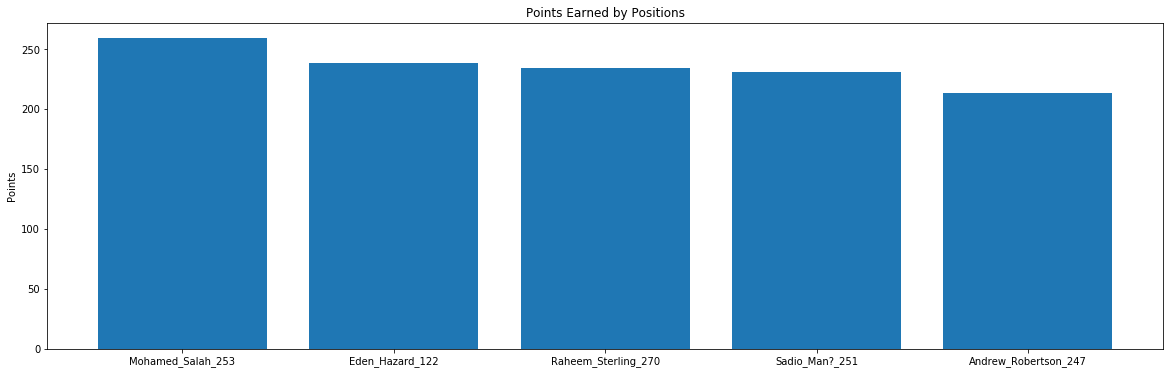

In [41]:
rcParams['figure.figsize'] = 20, 6

#objects = ('GK', 'FW', 'MF', 'DF')
objects = by_player.head().index

y_pos = np.arange(len(objects))

plt.bar(objects, by_player['total_points'].head(), align='center')

plt.xticks(y_pos, objects)
plt.ylabel('Points')
plt.title('Points Earned by Positions')

plt.show()

## 4.2) Pairplot

In [73]:
main_data['was_home']

id   fixture
1    1           True
     14         False
     21          True
     33         False
     46         False
     51          True
     61          True
     74         False
     81          True
     93         False
     101         True
     111         True
     121        False
     131         True
     145        False
     151         True
     167        False
     171         True
     181        False
     196        False
     201         True
     220        False
     221         True
     231         True
     248        False
     254        False
     261         True
     271         True
     287        False
     291         True
                ...  
611  369         True
     380        False
612  328         True
     339         True
     347        False
     359         True
     362        False
     379         True
613  342         True
     358        False
     362         True
     373        False
614  328         True
     347        Fal

In [76]:
column_list = ['total_points', 'bps','ict_index', 'influence']


column_list1 = ['assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'bps', 'clean_sheets',
       'clearances_blocks_interceptions', 'completed_passes', 'creativity',
       'dribbles', 'errors_leading_to_goal', 'errors_leading_to_goal_attempt',
       'fouls', 'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'key_passes', 'minutes', 'offside', 'open_play_crosses',
       'opponent_team', 'own_goals', 'penalties_conceded', 'penalties_missed',
       'penalties_saved', 'recoveries', 'red_cards', 'round', 'saves',
       'selected', 'tackled', 'tackles', 'target_missed', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'winning_goals',
       'yellow_cards', 'team', 'position', 'unique_id']
column_list2 = []
column_list3 = []

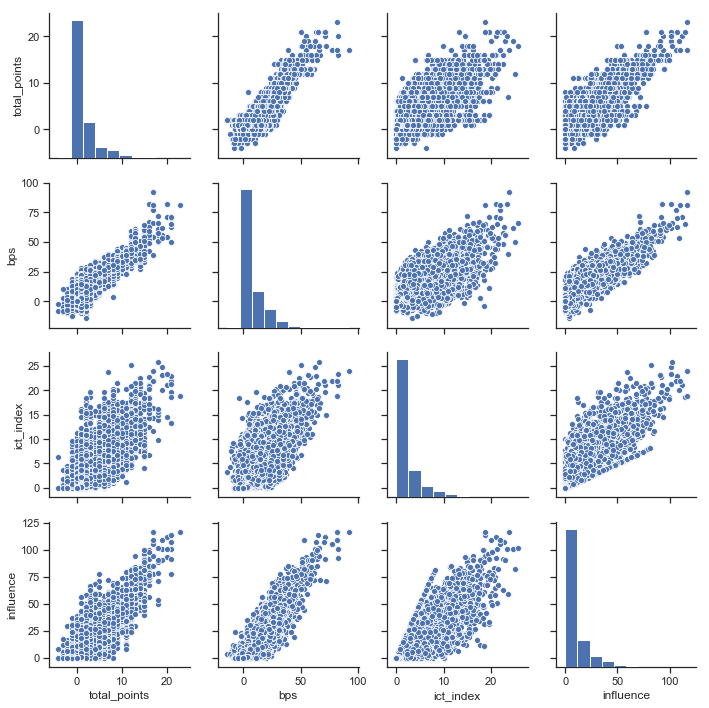

In [77]:
def pairplot(column_list):
    
    simple_main_data = main_data[column_list]

    # Time vs Temperature vs Load pairplot
    sns.set(style="ticks", color_codes=True)

    sns_plot = sns.pairplot(simple_main_data)
    #sns_plot.savefig(main_data_dir + "_pairplot.png")

  
pairplot(column_list)

# To-do

- change time 0 to 24
- compare graphs
- one-variable
- interaction term
- box plot